<a href="https://colab.research.google.com/github/sril1485/Data-sciecne-project/blob/master/fin_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

os.environ['KAGGLE_USERNAME'] = "srinidhikarthick" # username from the json file

os.environ['KAGGLE_KEY'] = "15467a092669b85df36db57586c2dee5" # key from the json file

!kaggle competitions download -c sberbank-russian-housing-market

  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 60.2MB/s]
100% 4.46M/4.46M [00:00<00:00, 45.2MB/s]

  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 15.3MB/s]
 29% 5.00M/17.1M [00:00<00:00, 36.2MB/s]
100% 17.1M/17.1M [00:00<00:00, 83.0MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 25.8MB/s]


In [0]:
!unzip \*.zip

Archive:  test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     

Archive:  macro.csv.zip
  inflating: macro.csv               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    

4 archives were successfully processed.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [0]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
test.shape

(7662, 291)

In [0]:
import numpy as np
## missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))
#missing values for 
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))



In [0]:
lenc = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = lenc.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = lenc.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

In [0]:
training = train.drop('price_doc',axis=1)

In [0]:
train['source'] = 0
test['source'] = 1

In [0]:
## taking sample from training and test data
training = training.sample(5000, random_state=12)
testing = test.sample(5000, random_state=11)

In [0]:
## combining random samples
combined = training.append(testing)
y = combined['source']
combined.drop('source',axis=1,inplace=True)

In [0]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combined.columns:
    score = cross_val_score(model,pd.DataFrame(combined[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

id 1.0
timestamp 0.9591851199999999
life_sq 0.85843088
build_year 0.8013424
kitch_sq 0.8990242000000002
hospital_beds_raion 0.88476004
cafe_sum_500_min_price_avg 0.84287168
cafe_sum_500_max_price_avg 0.84167752
cafe_avg_price_500 0.8438894799999999


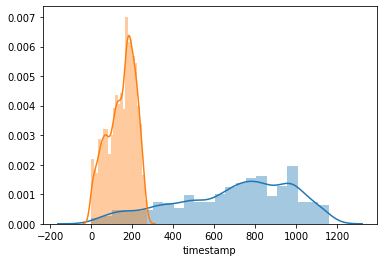

In [0]:
import seaborn as sns
sns.distplot(training['timestamp'])
sns.distplot(testing['timestamp'])

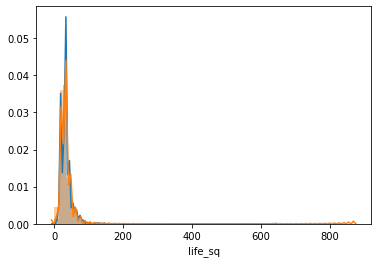

In [0]:
import seaborn as sns
sns.distplot(training['life_sq'])
sns.distplot(testing['life_sq'])

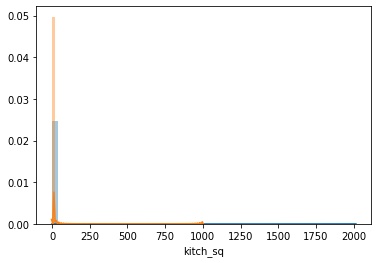

In [0]:
import seaborn as sns
sns.distplot(training['kitch_sq'])
sns.distplot(testing['kitch_sq'])

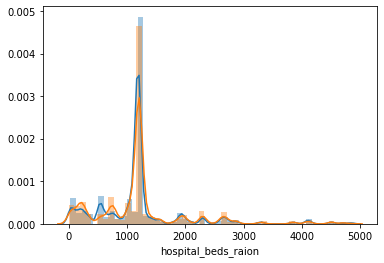

In [0]:
import seaborn as sns
sns.distplot(training['hospital_beds_raion'])
sns.distplot(testing['hospital_beds_raion'])

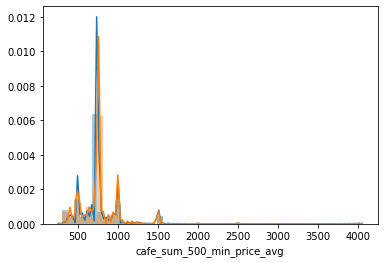

In [0]:
import seaborn as sns
sns.distplot(training['cafe_sum_500_min_price_avg'])
sns.distplot(testing['cafe_sum_500_min_price_avg'])

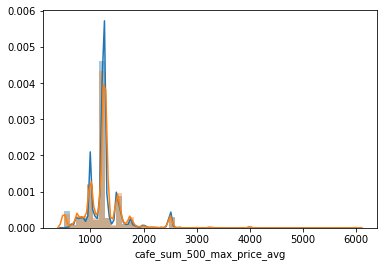

In [0]:
import seaborn as sns
sns.distplot(training['cafe_sum_500_max_price_avg'])
sns.distplot(testing['cafe_sum_500_max_price_avg'])

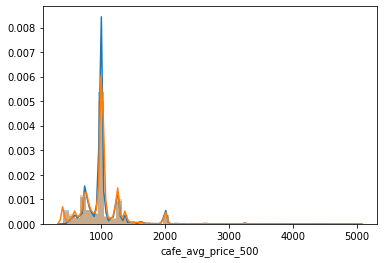

In [0]:
import seaborn as sns
sns.distplot(training['cafe_avg_price_500'])
sns.distplot(testing['cafe_avg_price_500'])

In [0]:
def boostrap_mean(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
  data_mean=np.mean(data_mean11)  
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  return data_mean,lower,upper
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(train['timestamp'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 1000)
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(test['timestamp'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 1000)


def boostrap_mean1(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
 
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  data_mean1=data_mean11[(data_mean11>lower) & (data_mean11<upper)]  
  data_mean=np.mean(data_mean1) 
  
 
  return data_mean
mean1=boostrap_mean1(train['timestamp'], 10000 )
mean2=boostrap_mean1(test['timestamp'],10000 )

T_obs=mean1-mean2


data1=train['timestamp']
data2=test['timestamp']
new_data=np.concatenate([data1,data2])
count=0
for i in range(20000):
  dat1=np.random.choice(new_data,7000)
  dat2=np.random.choice(new_data,6000)
  mean_dat1=np.mean(dat1)
  mean_dat2=np.mean(dat2)
  T_perm= mean_dat2-mean_dat1
  if T_perm>T_obs:
    count=count+1
p_value=count/20000
print(p_value)